# 8.1 向量自回归模型(VAR)

statsmodels.tsa.vector_ar contains methods that are useful for simultaneously modeling and analyzing multiple time series using Vector Autoregressions (VAR) and Vector Error Correction Models (VECM).

我们有兴趣对一个T×K的多变量时间序列Y进行建模，其中T表示观测值的数量，K表示变量的数量。估计时间序列与其滞后值之间关系的一种方法是向量自回归过程：

\begin{align}\begin{aligned}Y_t = \nu + A_1 Y_{t-1} + \ldots + A_p Y_{t-p} + u_t\\u_t \sim {\sf Normal}(0, \Sigma_u)\end{aligned}\end{align}

# 人民币美元VAR模型

In [2]:
path =r""

import pandas as pd

data1=pd.read_csv('datasets/美元指数历史数据.csv',index_col=0)
data=pd.DataFrame()
data['美元']=data1['收盘']
data2=pd.read_csv('datasets/USD_CNY历史数据.csv',index_col=0)
data['人民币汇率']=data2['收盘']
data.sort_index()

,美元,人民币汇率
日期,,
2010-1-10,77.32,6.8270
2010-1-17,78.28,6.8270
2010-1-24,79.46,6.8269
2010-1-3,77.47,6.8276
2010-1-31,80.44,6.8285
...,...,...
2023-2-26,104.52,6.9048
2023-2-5,103.63,6.8070
2023-3-12,103.71,6.8850


In [3]:
import numpy as np

In [4]:
yesterday_close = data.shift(1)
daily_logreturn=(data/yesterday_close).apply(np.log)

In [5]:
daily_logreturn= daily_logreturn.dropna()
data.head(5)

,美元,人民币汇率
日期,,
2023-3-19,103.12,6.8675
2023-3-12,103.71,6.8850
2023-3-5,104.58,6.9025
2023-2-26,104.52,6.9048
2023-2-19,105.21,6.9545


<AxesSubplot:xlabel='日期'>

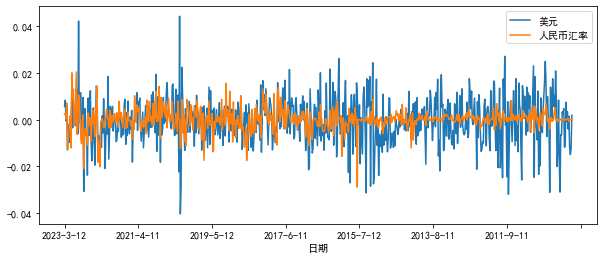

In [6]:
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示异常
daily_logreturn.plot(figsize=(10,4), legend=True)

In [7]:
daily_logreturn.describe()

,美元,人民币汇率
count,689.000000,689.000000
mean,-0.000415,-0.000008
std,0.010244,0.004750
min,-0.040388,-0.028903
25%,-0.006536,-0.001747
50%,-0.000566,0.000088
75%,0.006194,0.001911
max,0.044346,0.020476


In [8]:
import statsmodels.tsa.stattools as st
adf_t, pvalue, usedlag, nobs, critical_values, icbest = \
        st.adfuller(daily_logreturn['美元'])
print('adf的t统计量：', adf_t)
print('p值：', pvalue)
print('滞后阶数：', usedlag)
print('样本数：', nobs)
print('临界值：', critical_values)

adf的t统计量： -27.442787455265332
p值： 0.0
滞后阶数： 0
样本数： 688
临界值： {'1%': -3.439890503006147, '5%': -2.865750085260771, '10%': -2.569011980884938}


In [9]:
from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-Causality test
grangercausalitytests(daily_logreturn[['美元', '人民币汇率']], maxlag=[3])




Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.9991  , p=0.0077  , df_denom=679, df_num=3
ssr based chi2 test:   chi2=12.1211 , p=0.0070  , df=3
likelihood ratio test: chi2=12.0153 , p=0.0073  , df=3
parameter F test:         F=3.9991  , p=0.0077  , df_denom=679, df_num=3


{3: ({'ssr_ftest': (3.999139885595425, 0.007728674077729505, 679.0, 3),
   'ssr_chi2test': (12.12110439551603, 0.006979614713635858, 3),
   'lrtest': (12.015263922437953, 0.0073310552389396245, 3),
   'params_ftest': (3.9991398855954086, 0.00772867407772991, 679.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [10]:
from statsmodels.tsa.api import VAR

In [11]:
model = VAR(daily_logreturn)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1W-SUN will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
In [14]: results = model.fit(2)

In [15]: results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 16, Apr, 2023
Time:                     21:46:31
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -19.9439
Nobs:                     687.000    HQIC:                  -19.9844
Log likelihood:           4933.78    FPE:                2.04083e-09
AIC:                     -20.0099    Det(Omega_mle):     2.01145e-09
--------------------------------------------------------------------
Results for equation 美元
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -0.000489         0.000390           -1.255           0.210
L1.美元           -0.086654         0.040808           -2.123           0.034
L1.人民币汇率         0.183518         0.088575            2.072           0.038
L2.美元  

$$
Y:美元、X:人民币
$$

$$
Y_t=-0.000168-0.51Y_{t-1}+0.0804X_{t-1}-0.3167Y_{t-2}-0.061946X_{t-2} \\
X_t=0.002231+0.77Y_{t-1}-0.1951X_{t-1}+1.020374Y_{t-2}-0.479941X_{t-2}  
$$

## 参考
[1] statsmodels.tsa.vector_ar: <https://www.statsmodels.org/stable/vector_ar.html>